In [86]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from xgboost import XGBClassifier
import joblib


In [78]:

# Step 1: Load Train and Test Datasets
# Replace with the path to your datasets
train_data = pd.read_csv("/Users/brejesh/Downloads/archive-2/customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("/Users/brejesh/Downloads/archive-2/customer_churn_dataset-testing-master.csv")

# Inspect the train and test datasets
print(train_data.head())
print(train_data.info())
print(train_data.isnull().sum())

print(test_data.head())
print(test_data.info())
print(test_data.isnull().sum())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

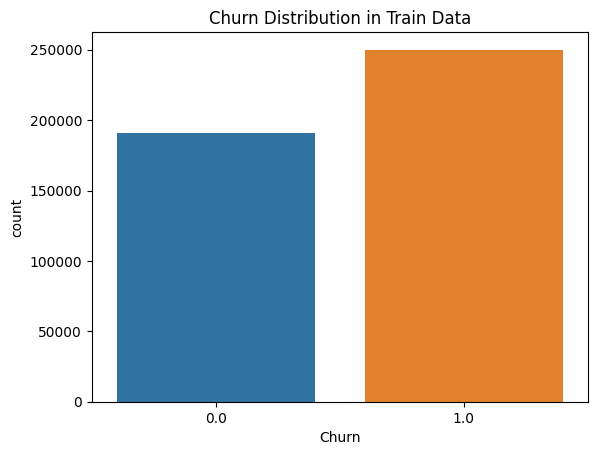

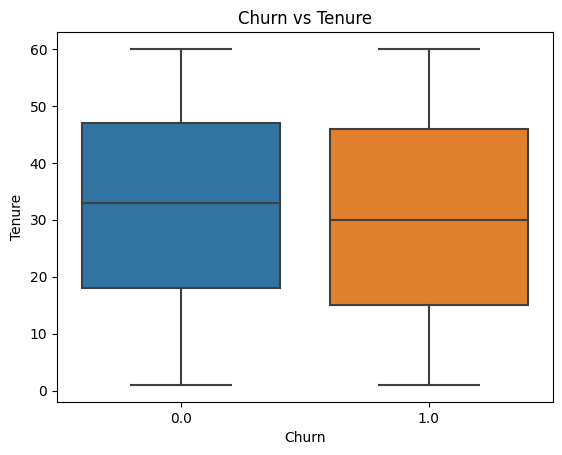

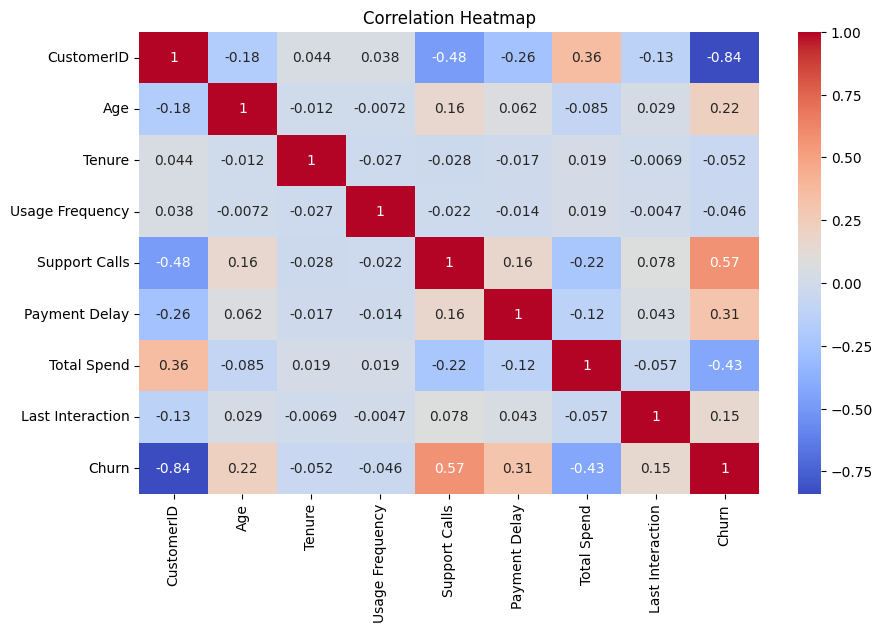

In [79]:
# Step 2: Perform EDA on Train Data
# Target distribution
sns.countplot(data=train_data, x="Churn")
plt.title("Churn Distribution in Train Data")
plt.show()

# Churn vs Tenure
sns.boxplot(x="Churn", y="Tenure", data=train_data)
plt.title("Churn vs Tenure")
plt.show()

# Correlation heatmap for numerical features
numerical_cols = train_data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [80]:
#Step 3: Data Preprocessing
# Handle missing values in 'Total Spend'
train_data["Total Spend"] = pd.to_numeric(train_data["Total Spend"], errors="coerce")
train_data["Total Spend"].fillna(train_data["Total Spend"].median(), inplace=True)

test_data["Total Spend"] = pd.to_numeric(test_data["Total Spend"], errors="coerce")
test_data["Total Spend"].fillna(test_data["Total Spend"].median(), inplace=True)

# Drop 'CustomerID' only if it exists
if 'CustomerID' in train_data.columns:
    train_data.drop('CustomerID', axis=1, inplace=True)
if 'CustomerID' in test_data.columns:
    test_data.drop('CustomerID', axis=1, inplace=True)


# Encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

# Align train and test data (to ensure same feature columns)
X_train = train_data.drop("Churn", axis=1)
y_train = train_data["Churn"]

X_test = test_data.drop("Churn", axis=1)
y_test = test_data["Churn"]


In [81]:
# Step 4: Train the Random Forest Model
# Drop rows with missing values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

# Train the model on cleaned data
rf_model.fit(X_train_clean, y_train_clean)
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



In [82]:
# Drop rows with NaN values in the target variable
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train[~y_train.isna()]

# Train the XGBoost model on the cleaned data
xgb_model.fit(X_train_clean, y_train_clean)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



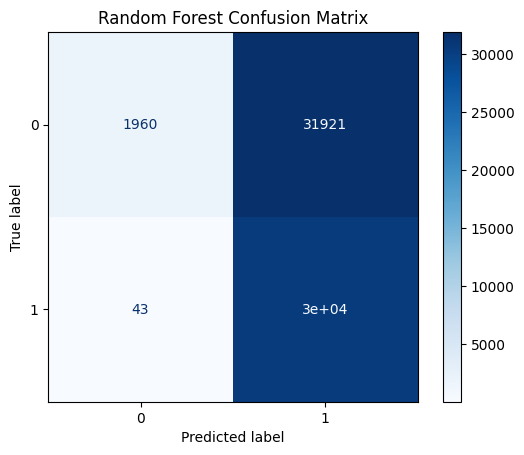

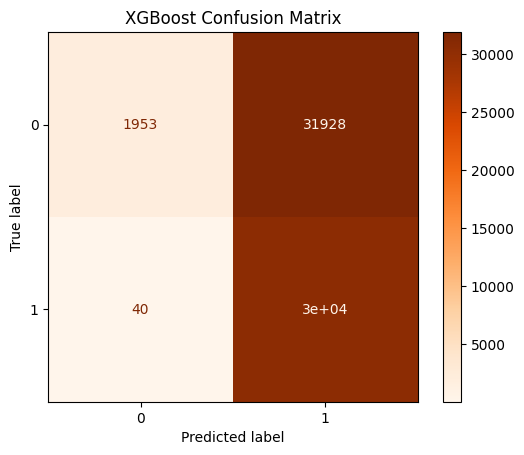

Random Forest F1-Score: 0.6557977257064094
XGBoost F1-Score: 0.6557917178112281


In [83]:
# Step 6: Confusion Matrix and F1-Score
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.show()

print("Random Forest F1-Score:", f1_score(y_test, rf_predictions))
print("XGBoost F1-Score:", f1_score(y_test, xgb_predictions))

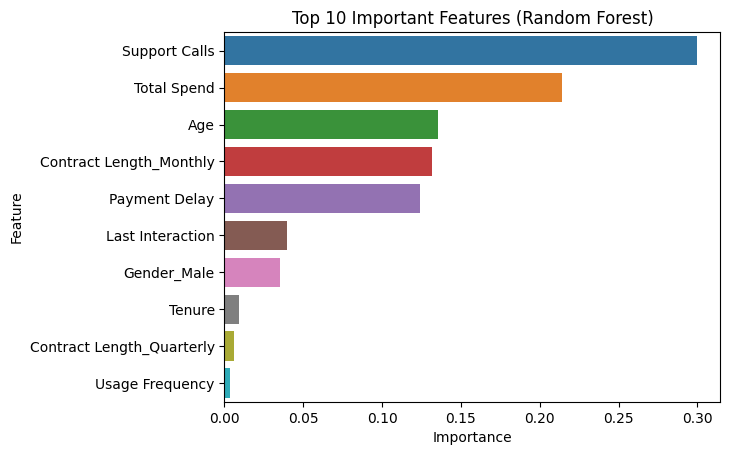

In [84]:
# Step 7: Feature Importance (Random Forest)
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [85]:
# Step 8: Save the Models


joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")


['xgb_model.pkl']